## Lesson 1. How Models Work


- 먼저, 머신러닝 모델들이 어떻게 작동하고, 어떻게 사용되는지 간략하게 시작.

- 모델을 만들기 위한 시나리오
```
    당신의 사촌은 부동산 투기로 수백만 달러를 벌었다.
    그는 데이터 과학에 대한 당신의 관심을 토대로 당신과 비지니스 파트너가 되겠다고 제안했다.
    그는 돈을 공급하고, 당신은 다양한 주택 가치를 예측하는 모델을 공급할 것이다.
    당신은 사촌에게 과거 부동산 가치를 어떻게 예측했는지 물어보았고, 그는 직관일 뿐이라며 대답했다.
    그러나, 더 많은 질문을 하게 되면, 그는 과거에 본 적이 있는 주택들을 토대로 가격 패턴을 식별했으며, 그 패턴을 사용하여 현재 고려 중인 새 주택에 대한 예측을 수행한다는 것을 깨닫게 된다.
```
- 머신러닝 또한, 위 시나리오와 동일한 방식으로 작동한다.

### Decision Tree

- 이해하기 쉬운 모델. 성능 좋은 다른 모델들의 기초가 되는 모델.
    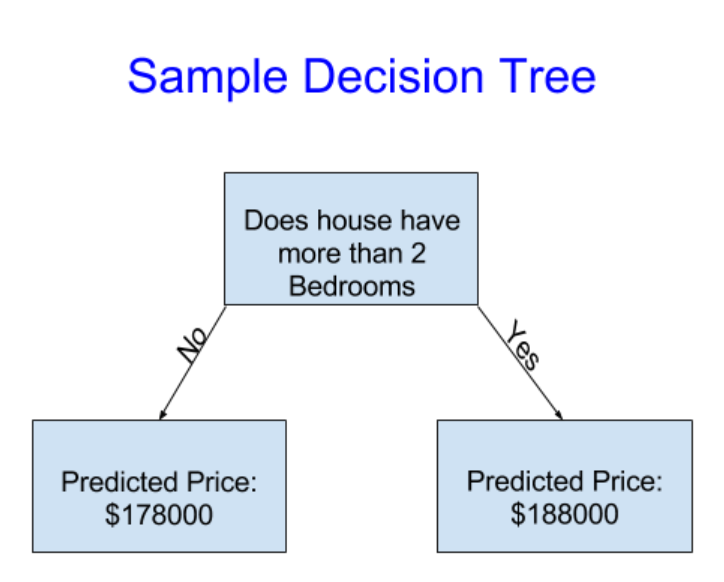
    - 주택을 2가지 범주로 나눈다. 예측 가격은 같은 범주에 있던 이전 주택들의 평균 가격이다.
    - 주택을 2개의 그룹으로 어떻게 나눌지 결정하기 위해 데이터를 사용한다. 그리고 다시 각 그룹의 예측 가격을 결정한다. -> 데이터로부터 패턴을 인식하는 이 단계를 **모델 피팅(fitting), 또는 트레이닝(training)**이라고 한다.
    - 모델을 피팅하는 데 사용되는 데이터를 훈련용 데이터(training data)라고 한다.
    - 모델이 어떻게 적합한지(e.g. 데이터를 분할하는 방법)에 대한 세부 정보는 꽤나 복잡하기 때문에 나중에 저장한다.
    - 모델이 피팅된 후에는, 새로운 데이터를 적용하여 추가 주택 가격을 예측할 수 있다.


### Improving the Decision Tree
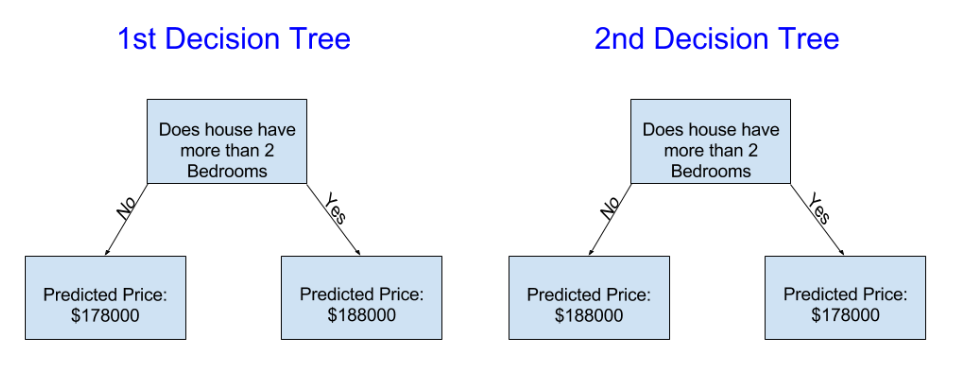
- 첫 번째 결정 트리가 더 합리적으로 보임.(침실이 많은 주택이 침실이 적은 주택보다 더 높은 가격에 판매되는 경향이 있기 때문.) 하지만, 이 모델의 가장 큰 단점은 욕실 수, 부지 크기, 위치 등 주택 가격에 영향을 미치는 대부분의 요인을 포착하지 못한다는 점.
- 더 많은 **분할**이 있는 트리를 사용하여 더 많은 요소들을 반영할 수 있다. 이러한 트리를 **더 깊은(deeper)** 트리라고 한다. 각 집의 부지의 총 크기도 고려하는 의사 결정 트리는 아래 그림과 같다.
 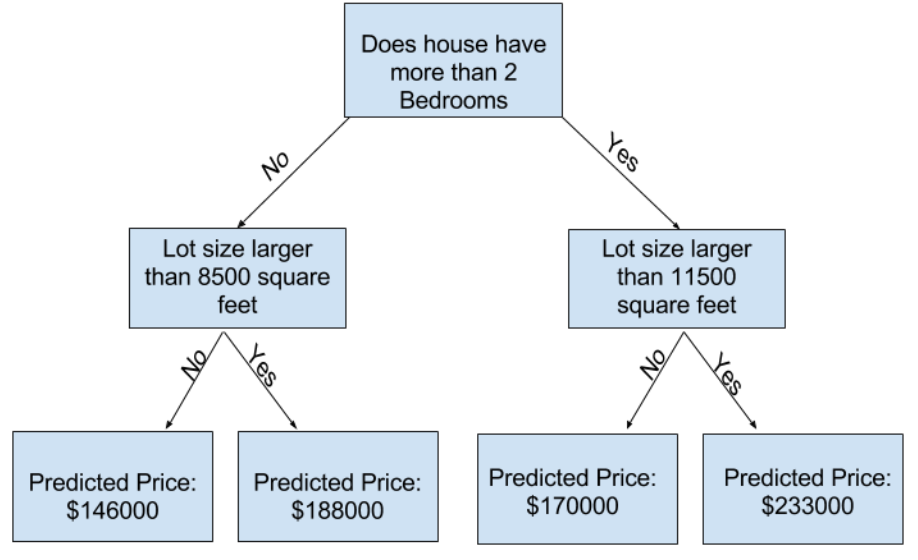
- 주택 예측 가격은 트리 하단에 존재한다. 우리가 예측을 하는 하단 지점을 **잎(leaf)**이라고 한다.

## Lesson 2. Basic Data Exploration


- 머신 러닝 프로젝트의 첫 번째 단계는 데이터에 익숙해지는 것. 이를 위해 Pandas 라이브러리를 사용한다.
- Pandas는 데이터를 탐색하고 조작하는 데 사용하는 주요 도구이다. 대부분의 사람들은 코드에서 Pandas를 **pd**라고 약칭한다. 이 작업을 명령어로 수행한다.

In [ ]:
import pandas as pd

- Pandas 라이브러리에서 가장 중요한 부분은 데이터프레임이다.
- 데이터프레임에는 테이블로 생각할 수 있는 유형의 데이터가 저장된다. 이는 엑셀 시트 또는 SQL 데이터베이스의 테이블과 유사하다.

In [ ]:
# 구글 드라이브 접근 허용
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
# save filepath to variable for easier access
melbourne_file_path = "/content/gdrive/My Drive/Colab Notebooks/MLData/melb_data.csv"

# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path)

# print a summty of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


### Exercises

In [ ]:
# colab에서 learntools 이용하기
!git clone https://github.com/Kaggle/learntools.git
!mv learntools learntools_dir
!mv learntools_dir/learntools learntools
from learntools.deep_learning import decode_predictions

Cloning into 'learntools'...
remote: Enumerating objects: 18651, done.
remote: Counting objects: 100% (1031/1031), done.
remote: Compressing objects: 100% (539/539), done.
remote: Total 18651 (delta 621), reused 870 (delta 491), pack-reused 17620 (from 1)
Receiving objects: 100% (18651/18651), 105.23 MiB | 28.09 MiB/s, done.
Resolving deltas: 100% (13733/13733), done.


In [ ]:
# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex2 import *
print('Setup Complete')

Setup Complete


### Step 1: Loading Data

In [ ]:
import pandas as pd

# Path of the file to read
iowa_file_path = "/content/gdrive/My Drive/Colab Notebooks/MLData/home_data.csv"

# Fill in the line below to read the file into a variable home_data
home_data = pd.read_csv(iowa_file_path)

### Step 2: Review The Data

In [ ]:
# Print summary statistics in next line
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# What is the average lot size (rounded to nearest integer)?
avg_lot_size = 10517

# As of today, how old is the newest home (current year - the date in which it was built)
newest_home_age = 14


### Think About Your Data
- 데이터에 포함된 최신 주택이 그다지 새롭지 않다. 이에 대한 몇 가지 잠재적인 설명이 가능하다.

    1. 이 데이터가 수집된 이후로 새 주택을 짓지 않았다.
    2. 데이터가 오래 전에 수집되었다. 데이터 수집 이후에 지어진 주택들에 대한 정보가 수집되지 않았다.

## Lesson 3. Your First Machine Learning Model

### Selecting Data for Modeling
- 데이터양이 매우 방대. -> 어떻게 이 방대한 데이터를 내가 이해할만한 정도로 정리할 것인가?
- 우선, 직관을 이용하여 몇 개의 변수들만 선택한다.

In [ ]:
import pandas as pd

melbourne_file_path = "/content/gdrive/My Drive/Colab Notebooks/MLData/melb_data.csv"

melbourne_data = pd.read_csv(melbourne_file_path)
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
# The Melbourne data has some missing values (some houses for which some variables weren't recoreded.)
# We'll laern to handle missing values in a later tutorial.
# Your Iowa data doesn't have missing values in the columns you use.
# So we will take the simplest option for now, and drop houses from our data.
# Don't worry about this much for now, though the code is:

# dropna drops missing values (think of na as 'not available')
melbourne_data = melbourne_data.dropna(axis=0)

-  Pandas에서는 데이터 subset을 선택하는 여러가지 방법을 자세히 다루지만, 현재로서는 2가지 접근 방식에 초점을 맞춘다.
    
    1. '예측 대상' 즉 prediction target을 선택하는 데 사용하는 점 표기법.
    2. '피처'들을 선택하는 데 사용하는 열 목록으로 선택하기.

### Selecting The Prediction Target
- Dot-notation을 이용하여 예측 타켓을 정의한다.

In [ ]:
y = melbourne_data.Price

### Choosing 'Features'

In [ ]:
melbourne_features = ['Rooms','Bathroom','Landsize','Lattitude','Longtitude']

In [ ]:
X = melbourne_data[melbourne_features]

In [ ]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [ ]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


### Building Your Model
- scikit-learn 라이브러리 사용
- sklearn
- 모델을 만들고 사용하는 과정

    1. Define : 어떤 종류의 모델을 사용할 것인지.
    2. Fit : 주어진 데이터에서 패턴을 발견하기.
    3. Predict : 예측하기.
    4. Evaluate : 모델 예측이 얼마나 정확한지 평가하기.


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define model.Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [ ]:
print('Making predictions for the following 5 houses :')
print(X.head())
print('The predictions are')
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses :
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


### Exercises

In [ ]:
import pandas as pd

# Path of the file to read
iowa_file_path = "/content/gdrive/My Drive/Colab Notebooks/MLData/home_data.csv"

# Fill in the line below to read the file into a variable home_data
home_data = pd.read_csv(iowa_file_path)

# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex3 import *

### Step 1 : Specify Prediction Target

In [ ]:
# print the list of columns in the dataset to find the name of the prediction target
home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
y = home_data.SalePrice

### Step 2 : Create X
- LotArea
- YearBuilt
- 1stFlrSF
- 2ndFlrSF
- FullBath
- BedroomAbvGr
- TotRmsAbvGrd

In [ ]:
# Create the list of features below
feature_names = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']

# Select data corresponding to features in feature_names
X = home_data[feature_names]

In [ ]:
# Review Data
X.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000


In [ ]:
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


### Step 3 : Specify and Fit Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# specify the model
# For model reproducibility, set a numeric value for random_state when specifying the model
iowa_model = DecisionTreeRegressor(random_state=1)

# Fit the model
iowa_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

### Step 4 : Make Predictions

In [ ]:
predictions = iowa_model.predict(X)
print(predictions)

[208500. 181500. 223500. ... 266500. 142125. 147500.]


## Lesson 4. Model Validation

- 모델 성능을 요약하는 데는 여러 가지 지표가 있지만, 평균 절대 오차(MAE)라는 지표부터 알아보겠다. 이 지표의 마지막 단어인 **오차**부터 세분화해 보겠다.

    각 주택의 예측 오차는 다음과 같다.

    `error = actual - predicted`

- MAE 지표를 사용하면 각 오차의 절댓값을 취한다. 이렇게 하면 각 오차가 양수로 변환되고, 이 절대오차들에 평균을 취한다. 이것이 바로 모델 품질의 척도이다.




In [ ]:
import pandas as pd

# Load data
melbourne_file_path = "/content/gdrive/My Drive/Colab Notebooks/MLData/melb_data.csv"

melbourne_data = pd.read_csv(melbourne_file_path)
# Filter rows with missing price values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea',
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]

from sklearn.tree import DecisionTreeRegressor
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

434.71594577146544

### The Problem with 'In-Sample' Scores
- 방금 계산한 척도는 '표본 내' 점수라고 할 수 있다. 단일 '표본'을 사용한 것인데, 이는 단점이 존재한다.
- 예를 들어, 대형 부동산 시장에서 문 색깔이 주택 가격과 무관하다고 상상해보자. 그러나, 모델 구축에 사용한 데이터 샘플에서 녹색 문이 있는 모든 주택은 매우 비쌌다. 모델의 임무는 주택 가격을 예측하는 패턴을 찾는 것이므로, 모델은 녹색 문이 있는 주택의 경우 항상 높은 가격을 예측하게 될 것이다.
- 이 패턴은 훈련 데이터에서 파생되었으므로 모델은 훈련 데이터에서 정확도를 보일 것이다.
- 그러나 모델이 새로운 데이터를 볼 때 이 패턴이 유지되지 않으면, 모델이 매우 부정확해질 수 있다.
- 모델의 실용적 가치는 **새로운 데이터에 대한 예측**을 하는 데서 비롯되므로 모델 구축에 사용되지 않은 데이터에 대한 성능을 측정한다.
- 이를 수행하는 가장 간단한 방법은 모델 구축 프로세스에서 일부 데이터를 제외한 다음 이를 사용하여 이전에 보지 못한 데이터에 대한 모델의 정확도를 테스트하는 것이다. 이 데이터는 검증 데이터(validation data)라고 한다.


In [ ]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we run script
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

258409.23886378307


### Exercises

In [ ]:
# Code you have previously used to load data
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Path of the file to read
iowa_file_path = "/content/gdrive/My Drive/Colab Notebooks/MLData/home_data.csv"

melbourne_data = pd.read_csv(melbourne_file_path)
melbourne_data.columns

home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice
feature_columns = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[feature_columns]

# Specify Model
iowa_model = DecisionTreeRegressor()
# Fit Model
iowa_model.fit(X, y)

print("First in-sample predictions:", iowa_model.predict(X.head()))
print("Actual target values for those homes:", y.head().tolist())

# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex4 import *


First in-sample predictions: [208500. 181500. 223500. 140000. 250000.]
Actual target values for those homes: [208500, 181500, 223500, 140000, 250000]


### Step 1 : Split Your Data

In [ ]:
# Import the train_test_split function and uncomment
from sklearn.model_selection import train_test_split

# fill in and uncomment
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

### Step 2 : Specify and Fit the Model

In [ ]:
# Specify the model
iowa_model = DecisionTreeRegressor(random_state=1)

# Fit iowa_model with the training data.
iowa_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

### Step 3 : Make Predictions with Validation data

In [ ]:
# Predict with all validation observations
val_predictions = iowa_model.predict(val_X)

In [ ]:
# print the top few validation predictions
print(val_predictions[:5])
# print the top few actual prices from validation data
print(val_y.head())

[186500. 184000. 130000.  92000. 164500.]
258     231500
267     179500
288     122000
649      84500
1233    142000
Name: SalePrice, dtype: int64


### Step 4 : Calculate the Mean Absolute Error in Validation Data

In [ ]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_y, val_predictions)

print(val_mae)

29652.931506849316


## Lesson 5. Underfitting and Overfitting

- 비교적 얕은 트리
    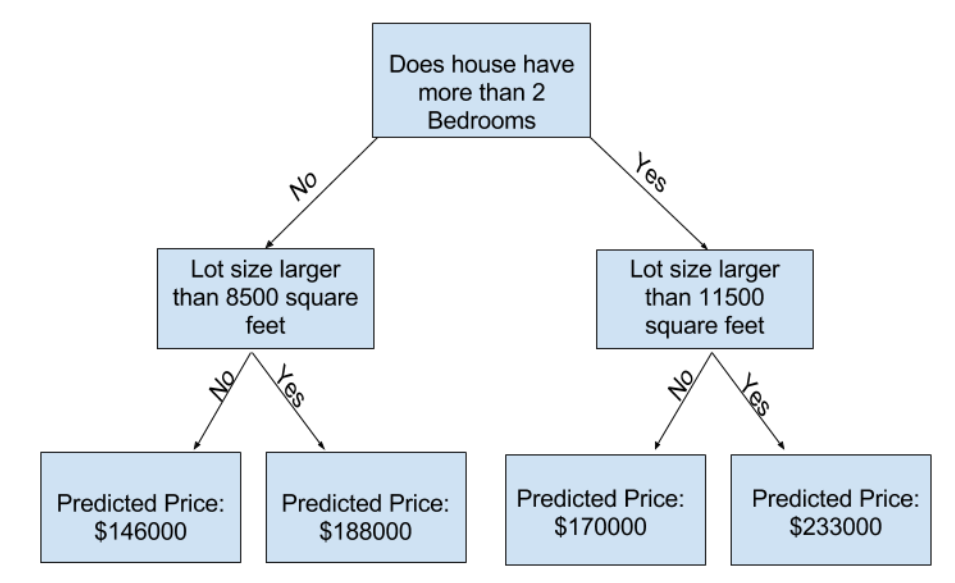

- 실제로 트리의 최상위 레벨과 잎 사이에 10개의 분할이 있는 경우는 흔치 않다. 트리가 깊어질수록 데이터 세트는 적은 집을 가진 잎들부터 잘라낸다.
- 집을 여러 잎으로 나누면 각 잎에 있는 집의 수가 줄어든다. 집이 거의 없는 잎은 해당 집의 실제 값에 매우 가까운 예측을 하지만, 각 예측은 몇 채의 집만을 기반으로 하므로 새로운 데이터에 대해 매우 신뢰할 수 없는 예측을 할 수도 있다. 이는 **과적합(overfitting)**이라고 불리는 현상으로, 모델이 학습 데이터와 거의 완벽하게 일치하지만 검증 및 기타 새로운 데이터에서는 잘 수행되지 않는다.
- 반대로 트리를 매우 얕게 만들면 집을 그다지 뚜렷한 그룹으로 나누지 않는다. 극단덕으로 트리가 집을 2, 4개로만 나눈다면 각 그룹에는 여전히 매우 많은 집이 존재한다. 학습 데이터에서도 대부분의 집에서 결과 예측이 멀리 떨어져 있을 수 있다. 이처험 모델이 데이터의 중요한 차이점과 패턴을 포착하지 못해 학습 데이터에서도 성능이 떨어지는 경우, **과소적합(underfitting)**이라고 한다.
- 우리는 과적합과 과소적합 그 사이의 포인트를 찾아야 한다. 시각적으로 아래 그림에서 빨간색 검증 곡선의 지점을 찾는다.
    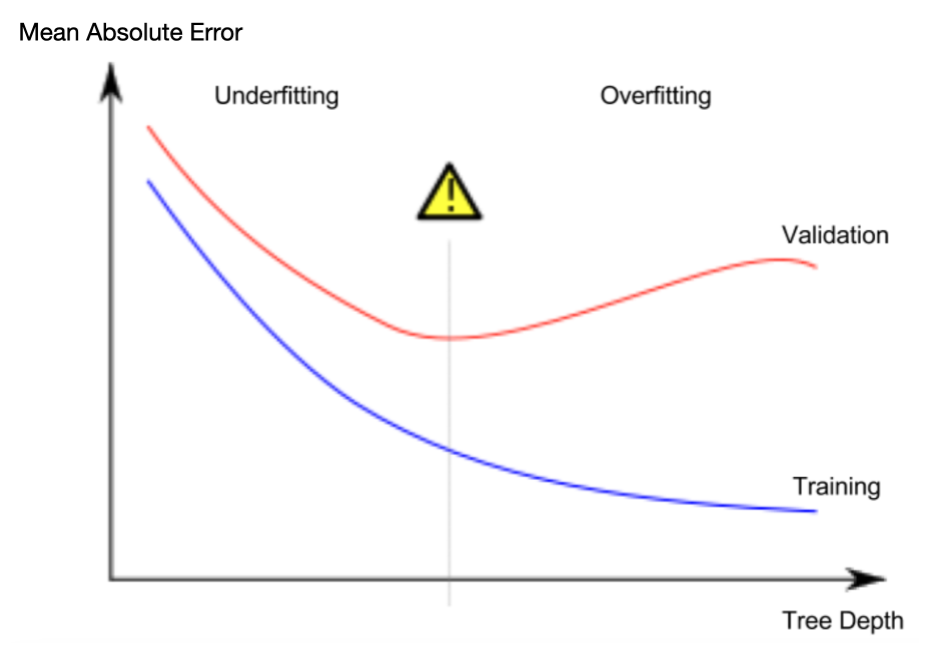

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [ ]:
# Data Loading Code Runs At This Point
import pandas as pd

# Load data
melbourne_file_path = "/content/gdrive/My Drive/Colab Notebooks/MLData/melb_data.csv"

melbourne_data = pd.read_csv(melbourne_file_path)
melbourne_data.columns
melbourne_data = pd.read_csv(melbourne_file_path)
# Filter rows with missing values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea',
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [ ]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print('Max leaf nodes: %d \t\t Mean Absolute Error: %d' %(max_leaf_nodes, my_mae))

Max leaf nodes: 5 		 Mean Absolute Error: 347380
Max leaf nodes: 50 		 Mean Absolute Error: 258171
Max leaf nodes: 500 		 Mean Absolute Error: 243495
Max leaf nodes: 5000 		 Mean Absolute Error: 255575


- 결론
- Overfitting : 미래에 반복되지 않을 가짜 패턴을 포착하여 정확도 떨어지거나 예측이 저하되는 경우.
- Underfitting : 관련 패턴을 포착하지 못해 다시 정확한 예측을 할 수 없는 경우.

### Exercises

In [ ]:
# Code you have previously used to load data
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Path of the file to read
iowa_file_path = "/content/gdrive/My Drive/Colab Notebooks/MLData/home_data.csv"

melbourne_data = pd.read_csv(melbourne_file_path)
melbourne_data.columns

home_data = pd.read_csv(iowa_file_path)
# Create target object and call it y
y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))

# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex5 import *

Validation MAE: 29,653


In [ ]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

### Step 1 : Compare Different Tree Sizes

In [ ]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
for max_leaf_nodes in candidate_max_leaf_nodes:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print('Max leaf nodes: %d \t\t Mean Absolute Error: %d' %(max_leaf_nodes, my_mae))

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = 100


Max leaf nodes: 5 		 Mean Absolute Error: 35044
Max leaf nodes: 25 		 Mean Absolute Error: 29016
Max leaf nodes: 50 		 Mean Absolute Error: 27405
Max leaf nodes: 100 		 Mean Absolute Error: 27282
Max leaf nodes: 250 		 Mean Absolute Error: 27893
Max leaf nodes: 500 		 Mean Absolute Error: 29454


### Step 2 : Fit Model Using All Data

In [ ]:
# Fill in argument to make optimal size and uncomment
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)

# fit the final model and uncomment the next two lines
final_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)

## Lesson 6. Random Forests

- 많은 트리를 사용하며 각 구성 요소 트리의 예측을 평균화하려 예측한다.
- 일반적으로 단일 의사 결정 트리보다 훨씬 더 나은 예측 정확도를 가지며, 기본 매개 변수와 잘 작동한다.

In [ ]:
import pandas as pd

# Load data
melbourne_file_path = "/content/gdrive/My Drive/Colab Notebooks/MLData/melb_data.csv"

melbourne_data = pd.read_csv(melbourne_file_path)
melbourne_data.columns
melbourne_data = pd.read_csv(melbourne_file_path)
# Filter rows with missing values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea',
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

191669.7536453626


### Exercises

In [ ]:
# Code you have previously used to load data
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Path of the file to read
iowa_file_path = "/content/gdrive/My Drive/Colab Notebooks/MLData/home_data.csv"

home_data = pd.read_csv(iowa_file_path)
# Create target object and call it y
y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

# Using best value for max_leaf_nodes
iowa_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))


# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex6 import *

Validation MAE when not specifying max_leaf_nodes: 29,653
Validation MAE for best value of max_leaf_nodes: 27,283


### Step 1 : Use a Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

# fit your model
rf_model.fit(train_X, train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))


Validation MAE for Random Forest Model: 21857.15912981083
